# CART (Classification & Regression Tree)

*Author: Eda AYDIN*

Table of Contents

1. [CART](#cart)
2. [CART Library Institutions](#cart-library-institutions)
3. [Modelling](#modelling)
4. [Hyperparameter Optimization](#hyperparameter-optimization)
5. [Final Model](#final-model)
6. [Feature Importance](#feature-importance)
7. [Analyzing Model Complexity with Learning Curves](#analyzing-model-complexity-with-learning-curves)
8. [Visualizing the Decision Tree](#visualizing-the-decision-tree)
9. [Extracting Decision Rules](#extracting-decision-rules)
10. [Extracting Python/SQL/Excel Codes of Decision Rules](#extracting-pythonsqlexcel-codes-of-decision-rules)
11. [Prediction using Python Codes](#prediction-using-python-codes)
12. [Saving and Loading Model](#saving-and-loading-model)

## CART

- Amaç veri seti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir.
- Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.

-----

- The aim is to transform the complex structures in the data set into simple decision structures.
- Heterogeneous data sets are divided into homogeneous subgroups according to a defined target variable.

## CART Library Institutions

![Cart 1 ](cart1.jpg)

![Cart 2](cart2.jpg)

$$RSS(SSE) : \sum_{j=1}^{J}\sum_{i\in R_j}^{}(y_i - \hat{y}_{R_j})^2$$

$R_j$ : bölge / yaprak / kutu

*Ayrım noktası nasıl belirlenir?*

- Belirlenen bağımsız değişken küçükten büyüğe doğru sıralanır. 
- Her defasından ayrım noktasının bulunduğu yer birer birer artarak devam eder. (Excel tablosu için konuşuyorum)
- Ardından her ayrım noktası sonucunda yukarıda hata ifadesinin sayısal bir karşılığı elde edilecektir. 
- Bu ifadeler arasında en küçük hata değerine sahip olan ayrım noktası ağacın karar noktasıdır.

*Yukarıdaki ayrım noktasını bulma işlemini bir değişken için yaptık, peki ya 10 ya da daha fazla bağımsız değişken olsa, o zaman nasıl ilerleyeceğiz?*

- Aynı işlemi tüm bağımsız değişkenler için yapacağız.
- Bunun neticesinde en düşük hatayı veren değişken, en önemli değişken olup, en tepede yer alacaktır.

-----

*How is the split point determined?*

- The specified argument is ordered from smallest to largest.
- Each time, the location of the separation point continues to increase one by one. (I'm talking for the Excel spreadsheet)
- Then, a numerical equivalent of the above error expression will be obtained as a result of each split point.
- The split point with the smallest error value among these expressions is the decision point of the tree.

*We did the above splitting point for one variable, but what if there are 10 or more independent variables, then how do we proceed?*

- We will do the same for all arguments.
- As a result, the variable with the lowest error will be the most important variable and will be at the top.

***Gini***:

$$\mathcal{L}_g(\mathcal{N}_m)=\sum_{k=1}^{K}\hat{P}_{mk}(1-\hat{P}_{mk})$$

- İlgili düğümde, gözlemler arasındaki benzerlik ne kadar yüksekse, gini değeri de o kadar düşük olacaktır.
----
- The higher the similarity between the observations at that node, the lower the gini value will be.

***Entropi***:

$$\mathcal{L}_E(\mathcal{N}_m)=-\sum_{k=1}^{K}\hat{P}_{mk}\,log\hat{P}_{mk}\cdot$$

- Ne kadar düşükse, o kadar iyidir.
- Entropi çeşitlilik, varyans demektir. Çeşitlilik ne kadar düşükse, o kadar iyidir.
----
- The lower it is, the better.
- Entropy means diversity, variance. The lower the variety, the better.

***The weighted loss***:

$$\mathcal{L}(\mathcal{S}_m) = f_L\cdot \mathcal{L}(C_{m}^{L}) + f_R \cdot\mathcal{L}(C_{m}^{R})\cdot$$

*Ne kadar bölmeliyiz?Terminal node, Leaf node içerisinde overfitting olayın düşmeden kaç tane gözlem bırakmalıyım?*

- Gini değeri ağırlıklı ortalama değerinden düşükse, bölmeyi bırakabilirsin.
- Aksi takdirde, bölme işlemi devam edecektir.

----

*How much should we divide? How many observations should I leave before the overfitting event drops in the terminal node, Leaf node?*

- If the Gini value is less than the weighted average, you can drop the split.
- Otherwise, the splitting process will continue.

![Calculation of Gini, Entropy](gini_entropi.png)

In [1]:
import warnings
import joblib
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.model_selection import train_test_split,GridSearchCV, cross_validate, validation_curve
from skompiler import skompile
import graphviz

c:\Users\choon\anaconda3\envs\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\choon\anaconda3\envs\python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\choon\anaconda3\envs\python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)

warnings.simplefilter(action="ignore",category=Warning)

## Modelling

### Modeling using CART

In [3]:
df = pd.read_csv("datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
y = df["Outcome"]
X = df.drop(["Outcome"],axis=1)

In [5]:
cart_model = DecisionTreeClassifier(random_state=1).fit(X,y)

In [6]:
# y_pred for confusion matrix
y_pred = cart_model.predict(X)

In [7]:
# y_prob for AUC
y_prob = cart_model.predict_proba(X)[:,1]

In [8]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



In [9]:
roc_auc_score(y, y_prob)

1.0

### Model Evaluation with Holdout Method

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=45)

In [11]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X_train,y_train)

In [12]:
# Train Error
y_pred = cart_model.predict(X_train)
y_prob = cart_model.predict_proba(X_train)[:, 1]

In [13]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       346
           1       1.00      1.00      1.00       191

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



In [14]:
roc_auc_score(y_train, y_prob)

1.0

In [15]:
# Test Error
y_pred = cart_model.predict(X_test)
y_prob = cart_model.predict_proba(X_test)[:, 1]

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       154
           1       0.53      0.56      0.54        77

    accuracy                           0.69       231
   macro avg       0.65      0.66      0.65       231
weighted avg       0.69      0.69      0.69       231



In [17]:
roc_auc_score(y_test, y_prob)

0.6558441558441559

Train verisinde hatanın olmaması, test verisinde hata çıkması, modelin overfitting ettiği anlamına gelir.

If there is no error in the train data and there is an error in the test data, it means that the model is overfitting.

### Model Evalaution with K-Cross Validate

In [18]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X,y)

In [19]:
cv_results = cross_validate(estimator=cart_model,
                            X=X,
                            y=y,
                            scoring=["accuracy","f1","roc_auc"])

In [20]:
cv_results['test_accuracy'].mean()

0.7058568882098294

In [21]:
cv_results['test_f1'].mean()

0.5710621194523633

In [22]:
cv_results['test_roc_auc'].mean()

0.6719440950384347

## Hyperparameter Optimization

In [23]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [24]:
cart_params = {"max_depth":range(1,11),
               "min_samples_split":range(2,20)}

In [25]:
cart_best_grid = GridSearchCV(estimator=cart_model,
                              param_grid=cart_params,
                              cv=5,
                              n_jobs=1,
                              verbose=1).fit(X,y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [26]:
cart_best_grid.best_params_

{'max_depth': 5, 'min_samples_split': 4}

In [27]:
cart_best_grid.best_score_

0.7500806383159324

In [28]:
random = X.sample(1, random_state=45)

In [29]:
cart_best_grid.predict(random)

array([1], dtype=int64)

## Final Model

In [30]:
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_,
                                    random_state=17).fit(X,y)
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [31]:
cart_final = cart_model.set_params(**cart_best_grid.best_params_).fit(X,y)

In [32]:
cv_results = cross_validate(estimator=cart_final,
                            X=X,
                            y=y,
                            cv=5,
                            scoring=["accuracy","f1","roc_auc"])

In [33]:
cv_results["test_accuracy"].mean()

0.7500806383159324

In [34]:
cv_results['test_f1'].mean()

0.614625004082526

In [35]:
cv_results['test_roc_auc'].mean()

0.797796645702306

## Feature Importance

In [36]:
cart_final.feature_importances_

array([0.01129738, 0.49448119, 0.05065617, 0.        , 0.01497644,
       0.22221379, 0.06819923, 0.13817579])

In [37]:
def plot_importance(model, features, num = len(X), save = False):
    feature_imp = pd.DataFrame({"Value":model.feature_importances_,
                                "Feature":features.columns})
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1)
    sns.barplot(x="Value",y = "Feature", data = feature_imp.sort_values(by="Value",
                                                                        ascending = False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    if save :
        plt.savefig("Feature Importance for {}.png".format(type(model).__name__))
    plt.show()

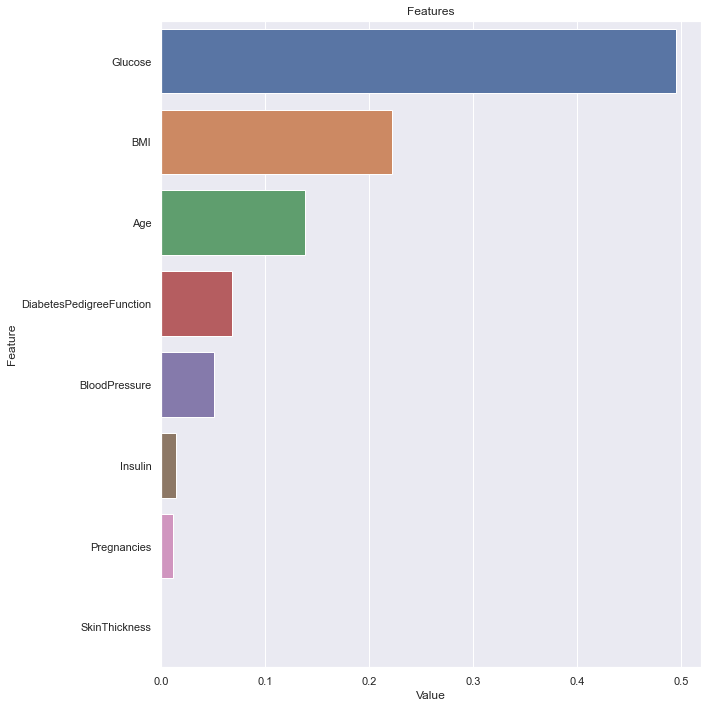

In [38]:
plot_importance(model= cart_model,
                features = X,
                num = len(X),
                save=True)

## Analyzing Model Complexity with Learning Curves

In [39]:
train_score,test_score = validation_curve(estimator=cart_final,
                                          X=X,
                                          y=y,
                                          param_name="max_depth",
                                          param_range=range(1,11),
                                          scoring="roc_auc",
                                          cv=10)

In [40]:
mean_train_score = np.mean(train_score,axis=1)
mean_test_score = np.mean(test_score,axis=1)

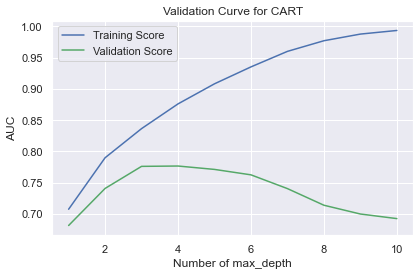

In [41]:
plt.plot(range(1, 11), mean_train_score,
         label="Training Score", color='b')
plt.plot(range(1, 11), mean_test_score,
         label="Validation Score", color='g')

plt.title("Validation Curve for CART")
plt.xlabel("Number of max_depth")
plt.ylabel("AUC")
plt.tight_layout()
plt.legend(loc='best')
plt.savefig("Validation Curve for CART.png")
plt.show()

In [42]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.savefig("{} - {} Graph".format(param_name,scoring))
    plt.show(block=True)

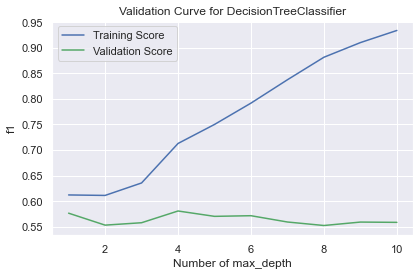

In [43]:
val_curve_params(cart_final, X, y, "max_depth", range(1, 11), scoring="f1")

In [44]:
cart_val_params = [["max_depth", range(1, 11)], ["min_samples_split", range(2, 20)]]

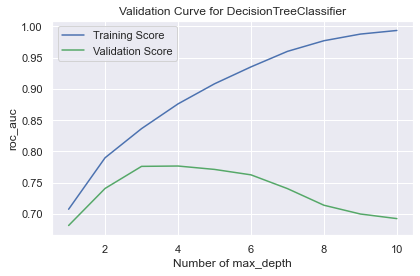

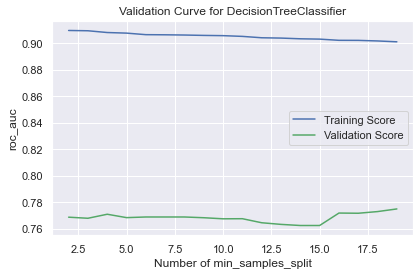

In [45]:
for i in range(len(cart_val_params)):
    val_curve_params(cart_model, X, y, cart_val_params[i][0], cart_val_params[i][1])

## Visualizing the Decision Tree

In [46]:
def tree_graph(model, col_names, file_name):
    tree_str = export_graphviz(model,
                               feature_names=col_names,
                               filled = True,
                               out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(file_name)

In [47]:
tree_graph(model=cart_final,
           col_names = X.columns,
           file_name = "cart_final.png")

In [48]:
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

## Extracting Decision Rules

In [49]:
tree_rules = export_text(decision_tree=cart_final,
                         feature_names=list(X.columns))
print(tree_rules)

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 45.40
|   |   |   |--- BMI <= 30.95
|   |   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  7.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- BMI >  30.95
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  45.40
|   |   |   |--- BloodPressure <= 99.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  99.00
|   |   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- BMI <= 9.65
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  9.65
|   |   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- Glucose <= 99.50
|   |   |   |   |--- Glucose <= 28.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Glucose >  28.50
|   |   |   |   |   |--- class: 0
|   |  

## Extracting Python/SQL/Excel Codes of Decision Rules

In [50]:
print(skompile(cart_final.predict).to('python/code'))

(((((0 if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else 0 if x[6] <=
    0.5005000084638596 else 0) if x[5] <= 45.39999961853027 else 1 if x[2] <=
    99.0 else 0) if x[7] <= 28.5 else (1 if x[5] <= 9.649999618530273 else 
    0) if x[5] <= 26.350000381469727 else (1 if x[1] <= 28.5 else 0) if x[1
    ] <= 99.5 else 0 if x[6] <= 0.5609999895095825 else 1) if x[1] <= 127.5
     else (((0 if x[5] <= 28.149999618530273 else 1) if x[4] <= 132.5 else 
    0) if x[1] <= 145.5 else 0 if x[7] <= 25.5 else 1 if x[7] <= 61.0 else 
    0) if x[5] <= 29.949999809265137 else ((1 if x[2] <= 61.0 else 0) if x[
    7] <= 30.5 else 1 if x[6] <= 0.4294999986886978 else 1) if x[1] <= 
    157.5 else (1 if x[6] <= 0.3004999905824661 else 1) if x[4] <= 629.5 else 0
    )



In [51]:
print(skompile(cart_final.predict).to('sqlalchemy/sqlite'))

SELECT CASE WHEN (x2 <= 127.5) THEN CASE WHEN (x8 <= 28.5) THEN CASE WHEN (x6 <= 45.39999961853027) THEN CASE WHEN (x6 <= 30.949999809265137) THEN CASE WHEN (x1 <= 7.5) THEN 0 ELSE 1 END ELSE 0 END ELSE CASE WHEN (x3 <= 99.0) THEN 1 ELSE 0 END END ELSE CASE WHEN (x6 <= 26.350000381469727) THEN CASE WHEN (x6 <= 9.649999618530273) THEN 1 ELSE 0 END ELSE CASE WHEN (x2 <= 99.5) THEN CASE WHEN (x2 <= 28.5) THEN 1 ELSE 0 END ELSE CASE WHEN (x7 <= 0.5609999895095825) THEN 0 ELSE 1 END END END END ELSE CASE WHEN (x6 <= 29.949999809265137) THEN CASE WHEN (x2 <= 145.5) THEN CASE WHEN (x5 <= 132.5) THEN CASE WHEN (x6 <= 28.149999618530273) THEN 0 ELSE 1 END ELSE 0 END ELSE CASE WHEN (x8 <= 25.5) THEN 0 ELSE CASE WHEN (x8 <= 61.0) THEN 1 ELSE 0 END END END ELSE CASE WHEN (x2 <= 157.5) THEN CASE WHEN (x8 <= 30.5) THEN CASE WHEN (x3 <= 61.0) THEN 1 ELSE 0 END ELSE 1 END ELSE CASE WHEN (x5 <= 629.5) THEN 1 ELSE 0 END END END END AS y 
FROM data


In [52]:
print(skompile(cart_final.predict).to('excel'))

A1=IF((x2<=127.5),IF((x ...418 chars skipped... ((x5<=629.5),1,0))))


## Prediction using Python Codes

In [53]:
def predict_with_rules(x):
    return ((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6864999830722809 else
        0) if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else ((1 if x[5
        ] <= 32.45000076293945 else 1 if x[3] <= 10.5 else 0) if x[2] <= 53.0 else
        ((0 if x[1] <= 111.5 else 0 if x[2] <= 72.0 else 1 if x[3] <= 31.0 else
        0) if x[2] <= 82.5 else 1) if x[4] <= 36.5 else 0) if x[6] <=
        0.5005000084638596 else (0 if x[1] <= 88.5 else (((0 if x[0] <= 1.0 else
        1) if x[1] <= 98.5 else 1) if x[6] <= 0.9269999861717224 else 0) if x[1
        ] <= 116.0 else 0 if x[4] <= 166.0 else 1) if x[2] <= 69.0 else ((0 if
        x[2] <= 79.0 else 0 if x[1] <= 104.5 else 1) if x[3] <= 5.5 else 0) if
        x[6] <= 1.098000019788742 else 1) if x[5] <= 45.39999961853027 else 0 if
        x[7] <= 22.5 else 1) if x[7] <= 28.5 else (1 if x[5] <=
        9.649999618530273 else 0) if x[5] <= 26.350000381469727 else (1 if x[1] <=
        28.5 else ((0 if x[0] <= 11.5 else 1 if x[5] <= 31.25 else 0) if x[1] <=
        94.5 else (1 if x[5] <= 36.19999885559082 else 0) if x[1] <= 97.5 else
        0) if x[6] <= 0.7960000038146973 else 0 if x[0] <= 3.0 else (1 if x[6] <=
        0.9614999890327454 else 0) if x[3] <= 20.0 else 1) if x[1] <= 99.5 else
        ((1 if x[5] <= 27.649999618530273 else 0 if x[0] <= 5.5 else (((1 if x[
        0] <= 7.0 else 0) if x[1] <= 103.5 else 0) if x[1] <= 118.5 else 1) if
        x[0] <= 9.0 else 0) if x[6] <= 0.19999999552965164 else ((0 if x[5] <=
        36.14999961853027 else 1) if x[1] <= 113.0 else 1) if x[0] <= 1.5 else
        (1 if x[6] <= 0.3620000034570694 else 1 if x[5] <= 30.050000190734863 else
        0) if x[2] <= 67.0 else (((0 if x[6] <= 0.2524999976158142 else 1) if x
        [1] <= 120.0 else 1 if x[6] <= 0.23899999260902405 else 1 if x[7] <=
        30.5 else 0) if x[2] <= 83.0 else 0) if x[5] <= 34.45000076293945 else
        1 if x[1] <= 101.0 else 0 if x[5] <= 43.10000038146973 else 1) if x[6] <=
        0.5609999895095825 else ((0 if x[7] <= 34.5 else 1 if x[5] <=
        33.14999961853027 else 0) if x[4] <= 120.5 else (1 if x[3] <= 47.5 else
        0) if x[4] <= 225.0 else 0) if x[0] <= 6.5 else 1) if x[1] <= 127.5 else
        (((((1 if x[1] <= 129.5 else ((1 if x[6] <= 0.5444999933242798 else 0) if
        x[2] <= 56.0 else 0) if x[2] <= 71.0 else 1) if x[2] <= 73.0 else 0) if
        x[5] <= 28.149999618530273 else (1 if x[1] <= 135.0 else 0) if x[3] <=
        21.0 else 1) if x[4] <= 132.5 else 0) if x[1] <= 145.5 else 0 if x[7] <=
        25.5 else ((0 if x[1] <= 151.0 else 1) if x[5] <= 27.09999942779541 else
        ((1 if x[0] <= 6.5 else 0) if x[6] <= 0.3974999934434891 else 0) if x[2
        ] <= 82.0 else 0) if x[7] <= 61.0 else 0) if x[5] <= 29.949999809265137
         else ((1 if x[2] <= 61.0 else (((((0 if x[6] <= 0.18299999833106995 else
        1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else 0) if x[2] <=
        73.0 else 0) if x[0] <= 4.5 else 1 if x[6] <= 0.6169999837875366 else 0
        ) if x[6] <= 1.1414999961853027 else 1) if x[5] <= 41.79999923706055 else
        1 if x[6] <= 0.37299999594688416 else 1 if x[1] <= 142.5 else 0) if x[7
        ] <= 30.5 else (((1 if x[6] <= 0.13649999350309372 else 0 if x[5] <=
        32.45000076293945 else 1 if x[5] <= 33.05000114440918 else (0 if x[6] <=
        0.25599999725818634 else (0 if x[1] <= 130.5 else 1) if x[0] <= 8.5 else
        0) if x[0] <= 13.5 else 1) if x[2] <= 92.0 else 1) if x[5] <=
        45.54999923706055 else 1) if x[6] <= 0.4294999986886978 else (1 if x[5] <=
        40.05000114440918 else 0 if x[5] <= 40.89999961853027 else 1) if x[4] <=
        333.5 else 1 if x[2] <= 64.0 else 0) if x[1] <= 157.5 else ((((1 if x[7
        ] <= 25.5 else 0 if x[4] <= 87.5 else 1 if x[5] <= 45.60000038146973 else
        0) if x[7] <= 37.5 else 1 if x[7] <= 56.5 else 0 if x[6] <=
        0.22100000083446503 else 1) if x[6] <= 0.28849999606609344 else 0) if x
        [6] <= 0.3004999905824661 else 1 if x[7] <= 44.0 else (0 if x[7] <=
        51.0 else 1 if x[6] <= 1.1565000414848328 else 0) if x[0] <= 6.5 else 1
        ) if x[4] <= 629.5 else 1 if x[6] <= 0.4124999940395355 else 0)

In [54]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

In [55]:
x = [12, 13, 20, 23, 4, 55, 12, 7]

In [56]:
predict_with_rules(x)

0

In [57]:
x = [6, 148, 70, 35, 0, 30, 0.62, 50]

In [58]:
predict_with_rules(x)

1

## Saving and Loading Model

In [59]:
joblib.dump(cart_final, "cart_final.pkl")

['cart_final.pkl']

In [60]:
cart_model_from_disc = joblib.load("cart_final.pkl")

In [61]:
x = [12, 13, 20, 23, 4, 55, 12, 7]

In [62]:
cart_model_from_disc.predict(pd.DataFrame(x).T)

array([1], dtype=int64)